In [17]:
import numpy as np
import pandas as pd

In [18]:
df=pd.read_csv('/kaggle/input/disease/heart_disease_uci.csv')

# EDA

In [19]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [20]:
df.shape

(920, 16)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [22]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [23]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [24]:
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings
warnings.filterwarnings('ignore')

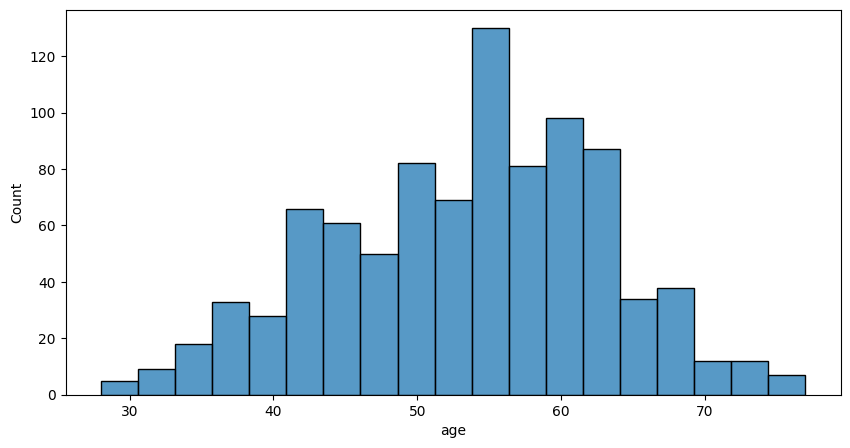

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'])
plt.show()

In [28]:
print(round(df['age'].mean(),2))
print(df['age'].median())
print(df['age'].mode()[0])

53.51
54.0
54


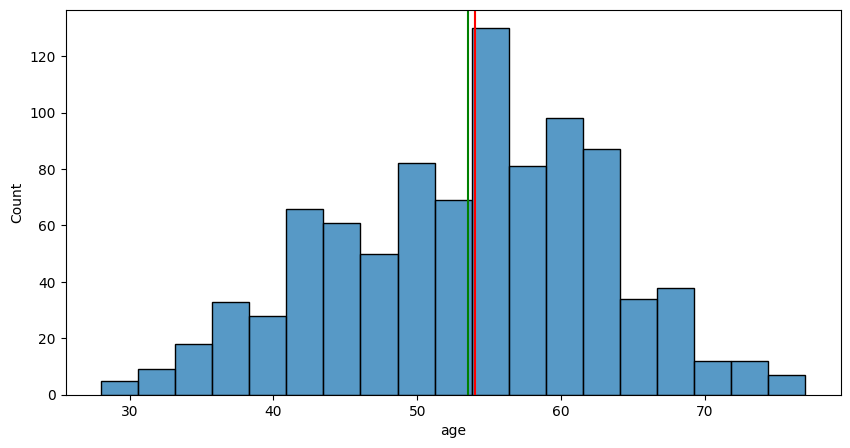

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'])
plt.axvline(df['age'].mean(),color='green')
plt.axvline(df['age'].mode()[0],color='yellow')
plt.axvline(df['age'].median(),color='red')
plt.show()

In [30]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

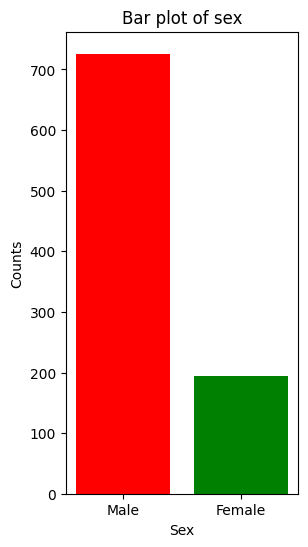

In [31]:
plt.figure(figsize=(3,6))
sex_counts=df['sex'].value_counts()
plt.bar(sex_counts.index,sex_counts.values,color=['red','green'])
plt.title('Bar plot of sex')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

In [32]:
male=726
female=194
total=male+female
male_prcnt=(male/total)*100;
female_prcnt=(female/total)*100;
print('male percentage',round(male_prcnt,2))
print('female percentage',round(female_prcnt,2))

male percentage 78.91
female percentage 21.09


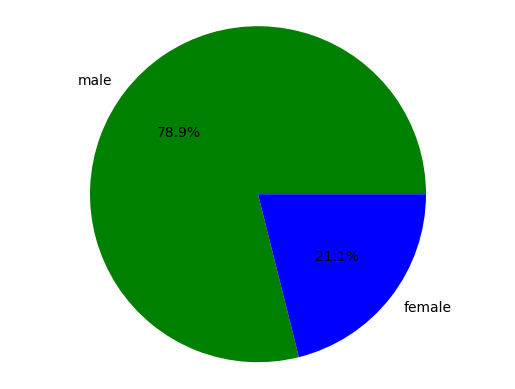

In [33]:
labels=['male','female']
sizes=[male_prcnt,female_prcnt]
colors=['green','blue']
plt.pie(sizes,colors=colors,labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [34]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

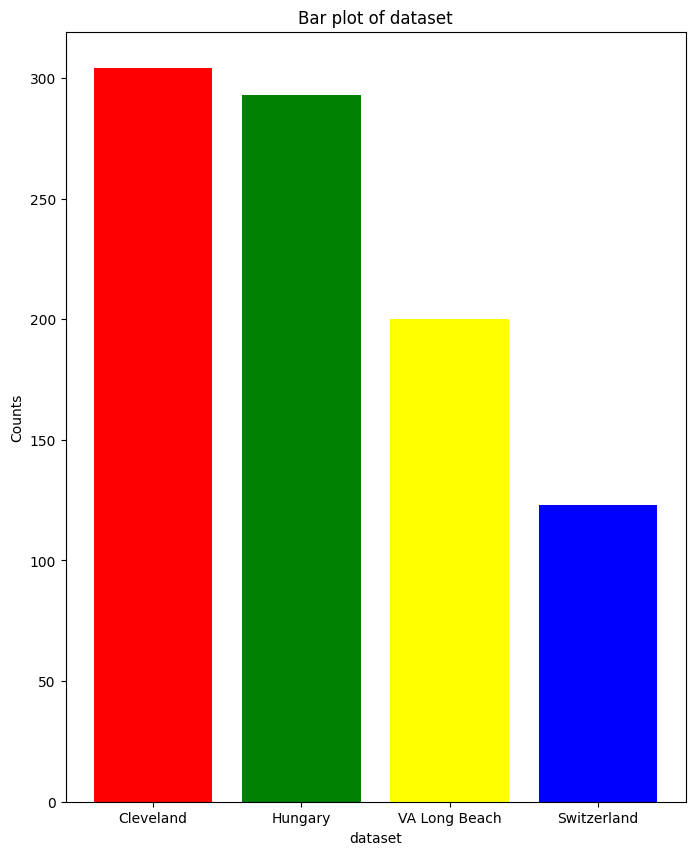

In [35]:
plt.figure(figsize=(8,10))
dataset_counts=df['dataset'].value_counts()
colors=['red','green','yellow','blue']
plt.bar(dataset_counts.index,dataset_counts.values,color=colors)
plt.title('Bar plot of dataset')
plt.xlabel('dataset')
plt.ylabel('Counts')
plt.show()

In [36]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

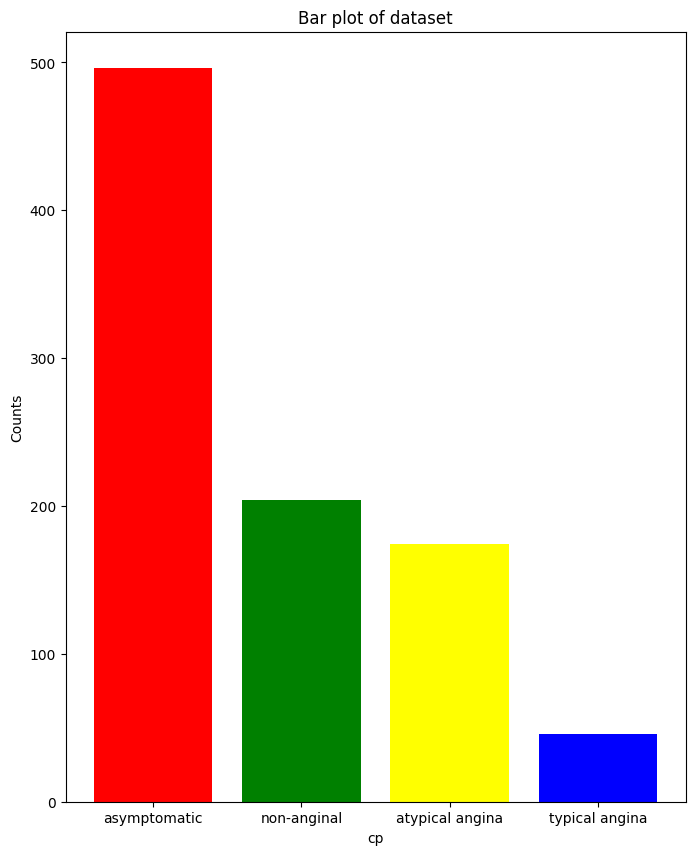

In [37]:
plt.figure(figsize=(8,10))
cp_counts=df['cp'].value_counts()
colors=['red','green','yellow','blue']
plt.bar(cp_counts.index,cp_counts.values,color=colors)
plt.title('Bar plot of dataset')
plt.xlabel('cp')
plt.ylabel('Counts')
plt.show()

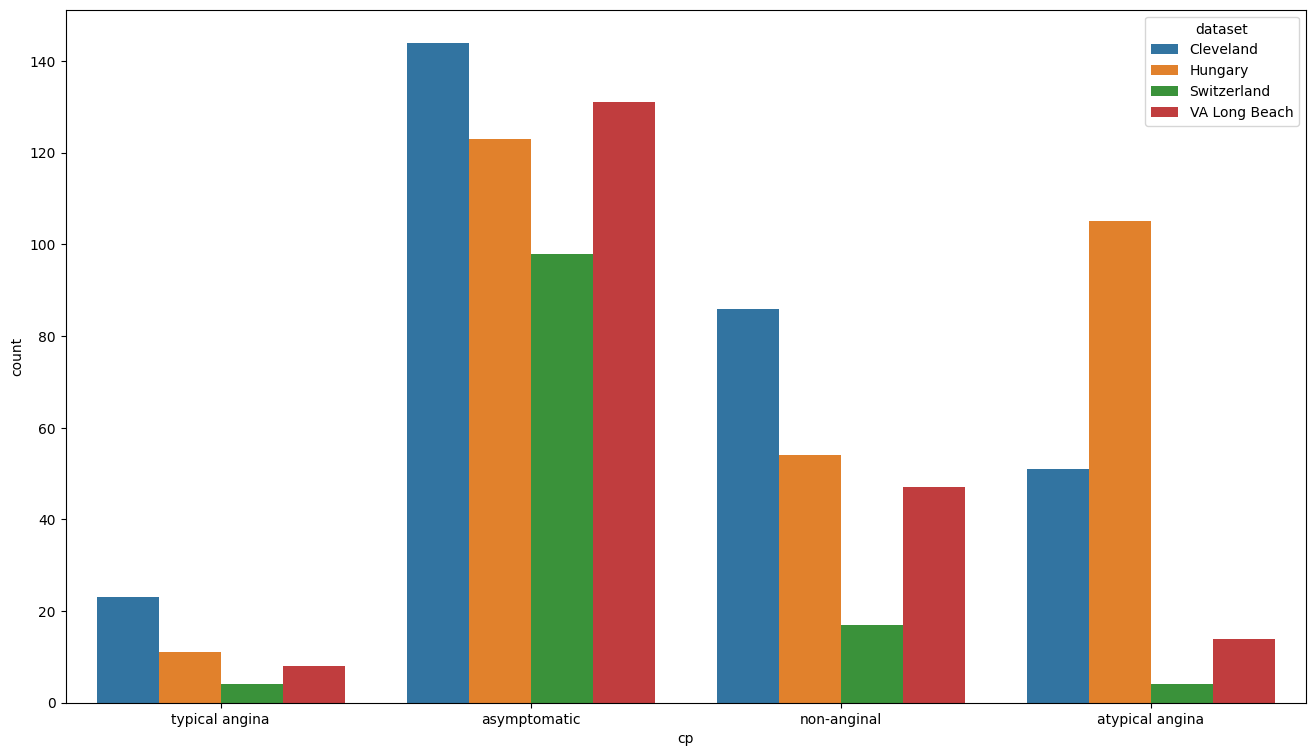

In [38]:
plt.figure(figsize=(16,9))
sns.countplot(data=df,x='cp',hue='dataset')
plt.show()

In [39]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


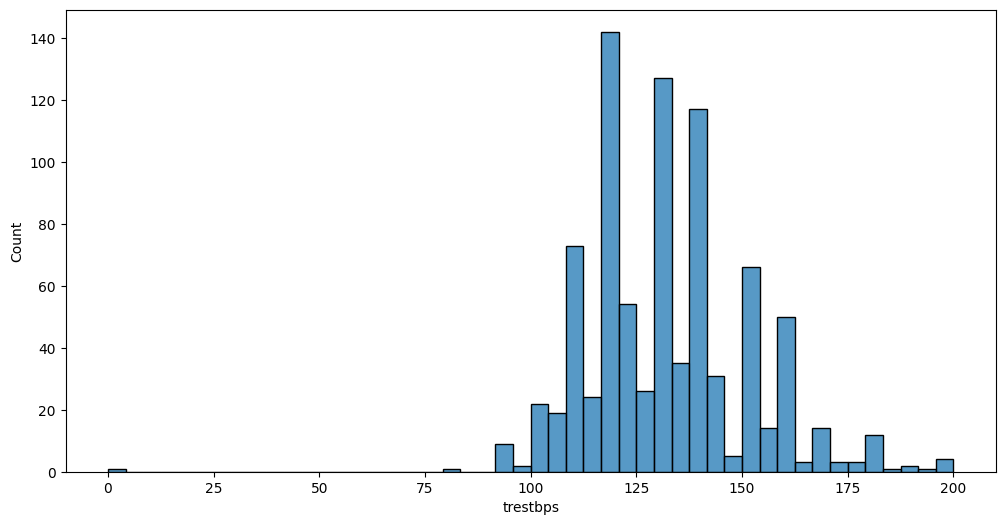

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df['trestbps'])
plt.show()

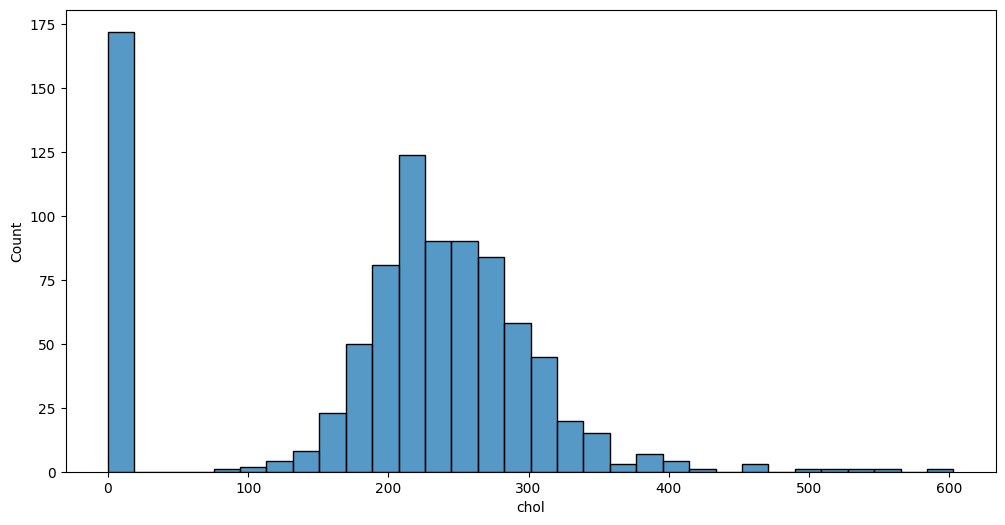

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df['chol'])
plt.show()

In [42]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

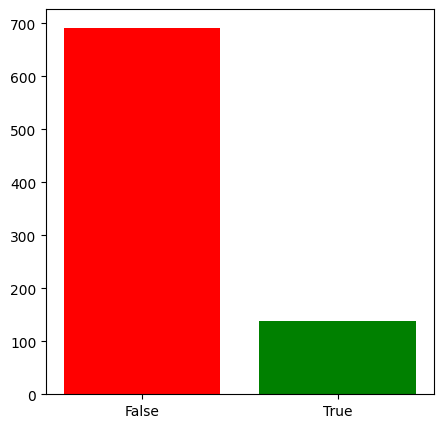

In [43]:
plt.figure(figsize=(5,5))
fbs_counts=df['fbs'].value_counts()
ctgri=['False','True']
clrs=['red','green']
plt.bar(ctgri,fbs_counts.values,color=clrs)
plt.show()

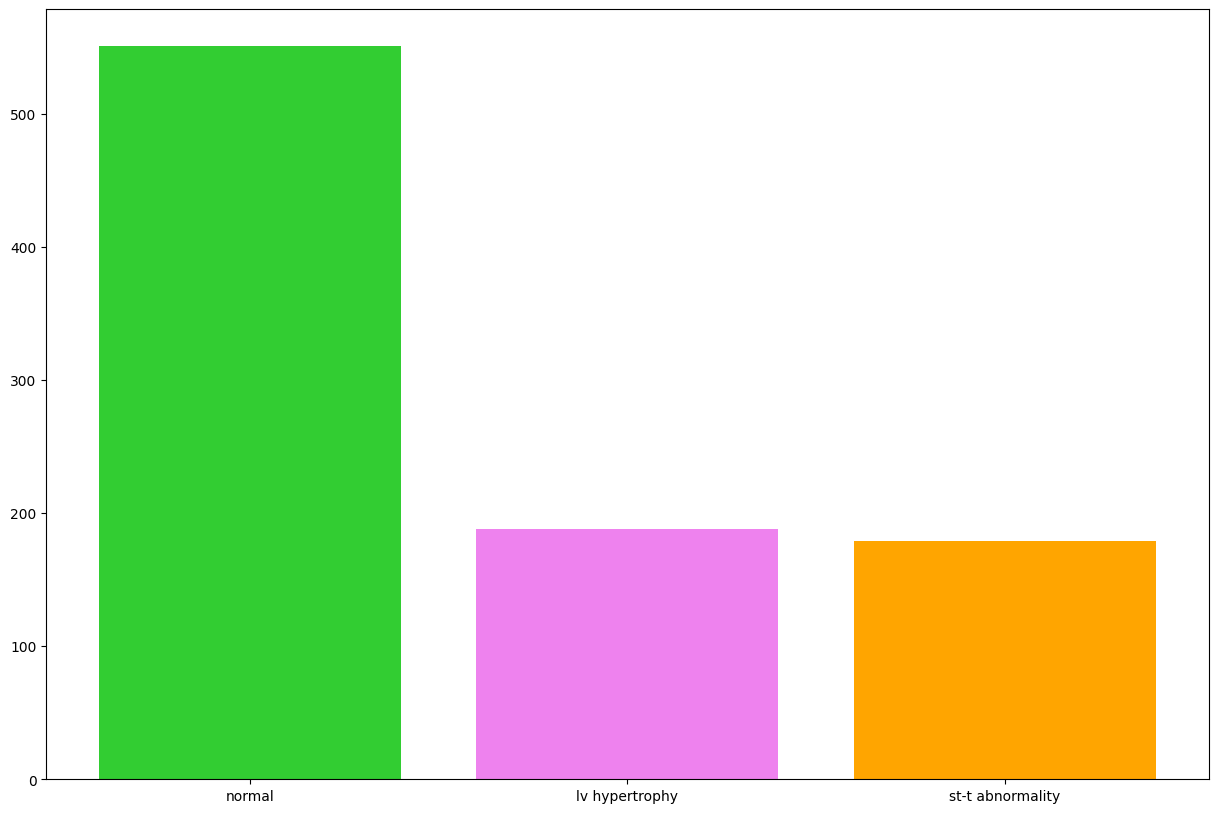

In [44]:
rstcg=df["restecg"].value_counts()
plt.figure(figsize=(15,10))
clrs=['limegreen','violet','orange']
plt.bar(rstcg.index,rstcg.values,color=clrs)
plt.show()

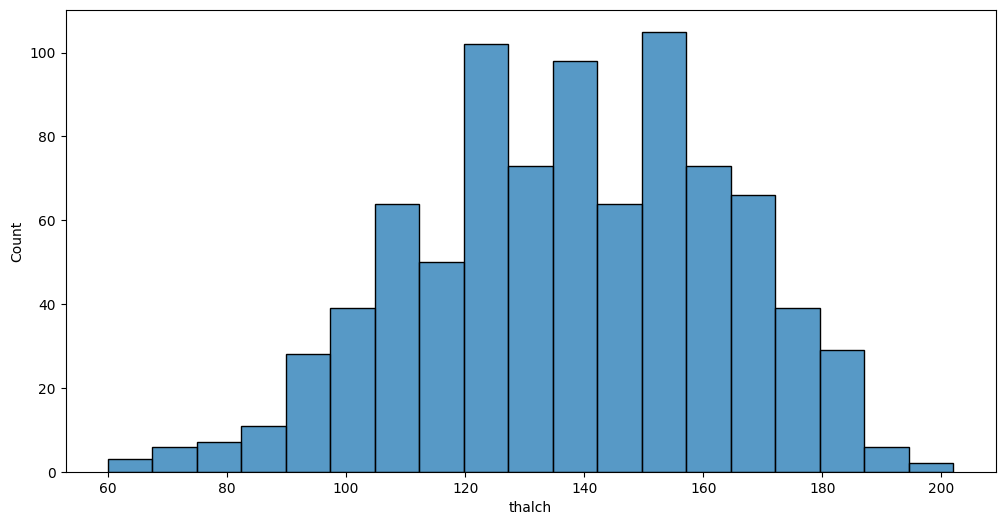

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df['thalch'])
plt.show()

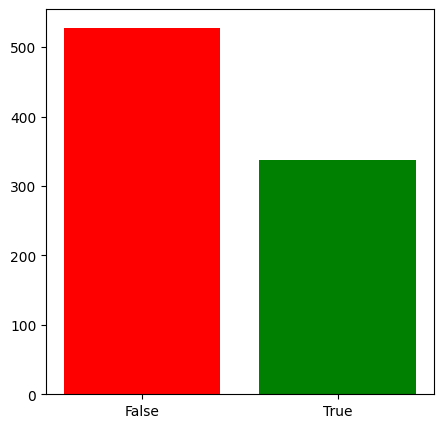

In [46]:
plt.figure(figsize=(5,5))
exang_counts=df['exang'].value_counts()
ctgri=['False','True']
clrs=['red','green']
plt.bar(ctgri,exang_counts.values,color=clrs)
plt.show()

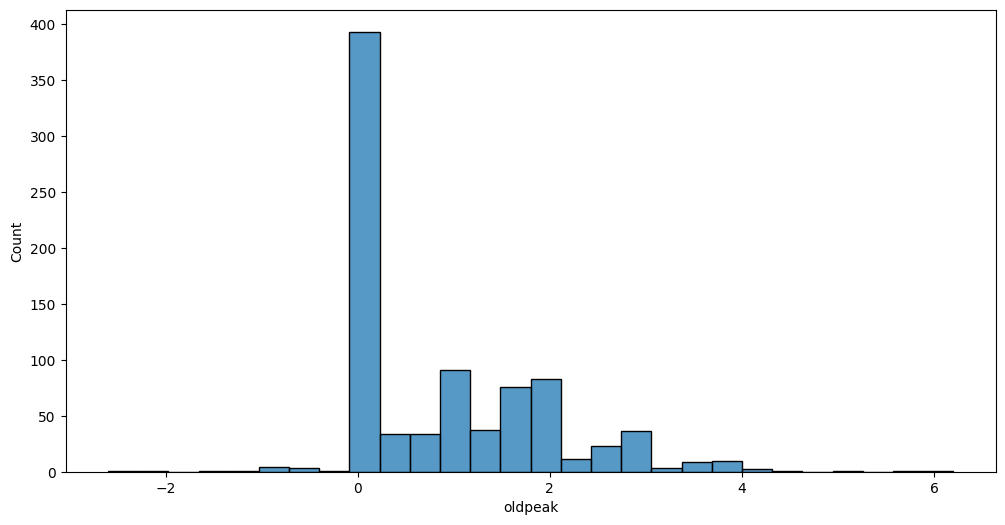

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df['oldpeak'])
plt.show()

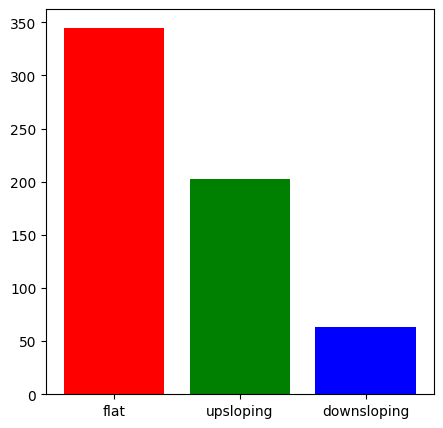

In [48]:
plt.figure(figsize=(5,5))
slope_counts=df['slope'].value_counts()
clrs=['red','green','blue']
plt.bar(slope_counts.index,slope_counts.values,color=clrs)
plt.show()

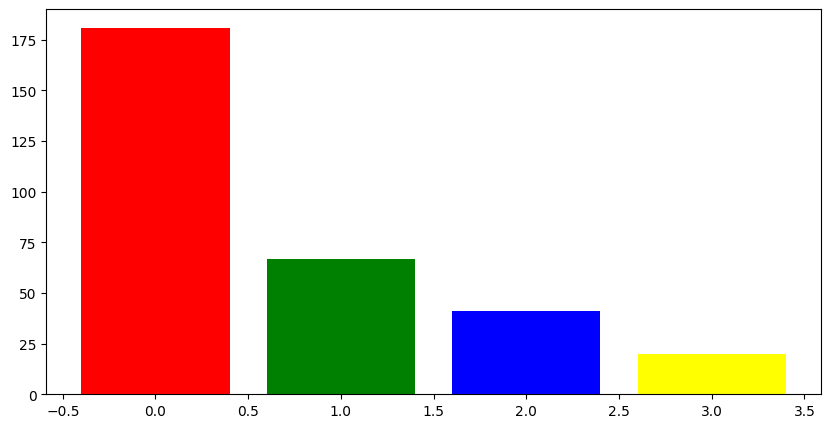

In [49]:
plt.figure(figsize=(10,5))
ca_counts=df['ca'].value_counts()
clrs=['red','green','blue','yellow']
plt.bar(ca_counts.index,ca_counts.values,color=clrs)
plt.show()

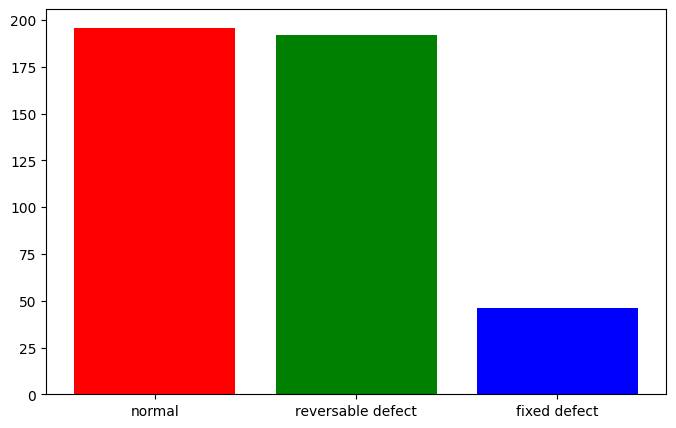

In [50]:
plt.figure(figsize=(8,5))
thal_counts=df['thal'].value_counts()
clrs=['red','green','blue']
plt.bar(thal_counts.index,thal_counts.values,color=clrs)
plt.show()

In [51]:
df["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

# Dealing With Missing Values

In [52]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [54]:
from sklearn.impute import SimpleImputer

In [55]:
def impute_missing_values(df):
    df_imputed = df.copy()
    
    # Impute numerical columns with median
    num_cols = df_imputed.select_dtypes(include=['number']).columns
    num_imputer = SimpleImputer(strategy='median')
    df_imputed[num_cols] = num_imputer.fit_transform(df_imputed[num_cols])
    
    # Impute categorical columns with most frequent value
    cat_cols = df_imputed.select_dtypes(exclude=['number']).columns
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_imputed[cat_cols] = cat_imputer.fit_transform(df_imputed[cat_cols])
    
    return df_imputed

# Example usage:
# df = pd.read_csv("your_data.csv")
df = impute_missing_values(df)
# print(df_cleaned)


In [56]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [57]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0.0


# Remove row where trestbps is 0

In [58]:
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754.0,55.0,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.0,normal,3.0


In [59]:
df=df[df['trestbps']!=0]

# Statistical Test to Select Best Features for our Predictive Model

# Chi-Square Test for Categorical Features

In [60]:
categorical_columns_for_chi_squared_test = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [61]:
df2=df

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
label_enc = LabelEncoder()
for col in categorical_columns_for_chi_squared_test:
    df2[col] = label_enc.fit_transform(df2[col])

In [64]:
X1 = df2[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']]
y1 = df2['num']

In [65]:
from sklearn.feature_selection import chi2

In [66]:
chi_scores = chi2(X1, y1)
chi2_scores = pd.DataFrame({"Feature": X1.columns, "Score": chi_scores[0]})
print(chi2_scores.sort_values(by="Score", ascending=False))

   Feature       Score
1       cp  161.895552
7       ca  119.388131
4    exang  110.881138
0      sex   18.455590
2      fbs   15.656211
5    slope   10.219112
6     thal    7.126765
3  restecg    3.492008


# ANOVA F-test for Numerical Features

In [67]:
X_num_for_f_test = df2[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

In [68]:
y_for_f_test = df2['num']

In [69]:
from sklearn.feature_selection import f_classif

In [70]:
f_scores, p_values = f_classif(X_num_for_f_test, y_for_f_test)
f_scores_df = pd.DataFrame({'Feature': X_num_for_f_test.columns, 'F-Score': f_scores})


In [71]:
print(f_scores_df.sort_values(by='F-Score', ascending=False))

    Feature    F-Score
4   oldpeak  49.810658
3    thalch  42.531150
0       age  31.249724
2      chol  18.145076
1  trestbps   4.132553


I choose to drop restecg, fbs, and trestbps since they have much lower scores and may not add much value to the model.

In [72]:
final_features = ['ca', 'cp', 'exang', 'slope', 'thal', 'oldpeak', 'thalch', 'age', 'chol', 'trestbps']

In [73]:
final_df=df2[final_features+['num']]

In [74]:
final_df.head()

,ca,cp,exang,slope,thal,oldpeak,thalch,age,chol,trestbps,num
0,0.0,3,0,0,0,2.3,150.0,63.0,233.0,145.0,0.0
1,3.0,0,1,1,1,1.5,108.0,67.0,286.0,160.0,2.0
2,2.0,0,1,1,2,2.6,129.0,67.0,229.0,120.0,1.0
3,0.0,2,0,0,1,3.5,187.0,37.0,250.0,130.0,0.0
4,0.0,1,0,2,1,1.4,172.0,41.0,204.0,130.0,0.0


In [75]:
final_df["num"].value_counts()

num
0.0    411
1.0    265
2.0    109
3.0    106
4.0     28
Name: count, dtype: int64

In [76]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ca        919 non-null    float64
 1   cp        919 non-null    int64  
 2   exang     919 non-null    int64  
 3   slope     919 non-null    int64  
 4   thal      919 non-null    int64  
 5   oldpeak   919 non-null    float64
 6   thalch    919 non-null    float64
 7   age       919 non-null    float64
 8   chol      919 non-null    float64
 9   trestbps  919 non-null    float64
 10  num       919 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 86.2 KB


In [77]:
X = final_df.drop(['num'], axis=1)
y = final_df['num']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Here is the list of models that we will use for heart disease prediction
1. Logistic Regression
2. Naive Bayse
3. Support vector machines (svm)
4. Decision Tree
5. Random Forest
6. KNN
7. XGboost
8. Adaboost
9. GradiantBoost
10. Catboost
11. LightGBM

In [80]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.5619047619047619
Test Accuracy: 0.5434782608695652

Model: Gradient Boosting
Cross-validation Accuracy: 0.5564625850340136
Test Accuracy: 0.5815217391304348

Model: Support Vector Machine
Cross-validation Accuracy: 0.4965986394557823
Test Accuracy: 0.47282608695652173

Model: Logistic Regression
Cross-validation Accuracy: 0.5768707482993197
Test Accuracy: 0.5380434782608695

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.4897959183673469
Test Accuracy: 0.483695652173913

Model: Decision Tree
Cross-validation Accuracy: 0.491156462585034
Test Accuracy: 0.5

Model: Ada Boost
Cross-validation Accuracy: 0.5523809523809524
Test Accuracy: 0.5163043478260869

Model: XG Boost
Cross-validation Accuracy: 0.5578231292517006
Test Accuracy: 0.5597826086956522

Model: Naive Bayes
Cross-validation Accuracy: 0.5741496598639456
Test Accuracy: 0.5271739130434783

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))])